In [2]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MNIST classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

## data :: 784 * 70,000 so 784 pixel (feature) and 70,000 ( images)
## target :: label for 70,000 images

In [4]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


4.0


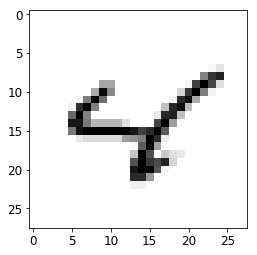

In [5]:
randDigit = X[28000]
print(y[28000])
randDigit_Image = randDigit.reshape(28,28)
plt.imshow(randDigit_Image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.show()

## MNIST original database is divided into 60,000 training data and 10,000 test data

In [6]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Shuffle the training data index 
### here we are shuffling
### (Imp) when to shuffle and when not to shuffle

In [7]:
import numpy as np
shuffled_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffled_index],y_train[shuffled_index]

In [8]:
# Binary Classifier for 4
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [9]:
## Stochastic Gradient Classifier 
## used for large scale database 
## no need to iterate over by m steps for each feature to modify weight
## changes over each datapoint after randomly shuffling dataset

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_4)

D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([randDigit])

array([ True], dtype=bool)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_4,cv=4,scoring='accuracy')

D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochas

array([ 0.97820145,  0.97686821,  0.97439829,  0.97159811])

In [12]:
from sklearn.base import BaseEstimator

class Never4Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [13]:
## Since the no of 4 is 10% so 90% is not good 
## Therefore for Classification Problems Score is evaluted differnetly (for eg. Confusion Matrix)

never_4_clf = Never4Classifier()
cross_val_score(never_4_clf,X_train,y_train_4,cv=4,scoring='accuracy')

array([ 0.90526667,  0.8996    ,  0.90473333,  0.90093333])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_4,cv=4)

D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochas

In [15]:
############################# Confusion Matrix ######################################

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_4,y_train_pred))
confusion_matrix(y_train_4,y_train_4)

[[53386   772]
 [  712  5130]]


array([[54158,     0],
       [    0,  5842]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(precision_score(y_train_4,y_train_pred))
print(recall_score(y_train_4,y_train_pred))
print(f1_score(y_train_4,y_train_pred))

0.869196882413
0.878123930161
0.87363760218


In [17]:
y_scores = sgd_clf.decision_function([randDigit])
## Default Threshold := 0
## Increasing Threshold := Increasing Precision / Decreasing Recall
y_scores

array([ 111843.56481348])

In [18]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_4,cv=4,method='decision_function')

D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\AI_tools\lib\site-packages\sklearn\linear_model\stochas

In [19]:
y_scores.shape

(60000,)

In [20]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_4,y_scores)

Saving figure precision_recall_vs_threshold_plot


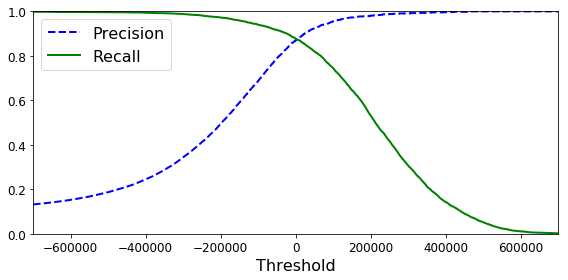

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [22]:
## y_Score > Threshold := 0 True
## y_Score < Threshold := 0 False
## So Change Threshold to Increse precision or Recall 
## 90% precision := Threshold == 400000
## 90% recall := Threshold == -400000

y_train_pred_prec90 = (y_scores > 40000)

print(precision_score(y_train_4,y_train_pred_prec90))
print(recall_score(y_train_4,y_train_pred_prec90))
print(f1_score(y_train_4,y_train_pred_prec90))
print('----------------------------------------------------------------')
y_train_pred_prec90 = (y_scores > -50000)

print(precision_score(y_train_4,y_train_pred_prec90))
print(recall_score(y_train_4,y_train_pred_prec90))
print(f1_score(y_train_4,y_train_pred_prec90))

0.916070756492
0.833276275248
0.872714234493
----------------------------------------------------------------
0.789419392868
0.916980486135
0.848432055749


Saving figure precision_vs_recall_plot


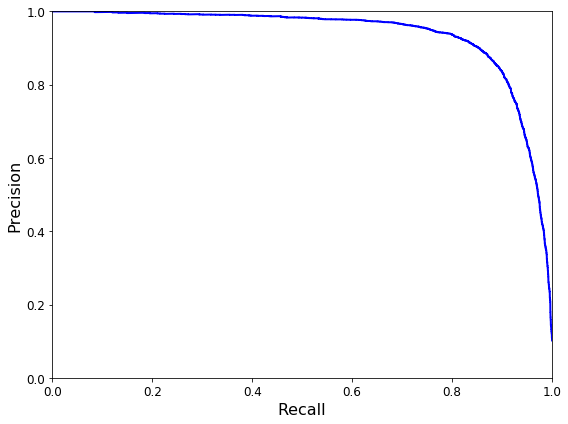

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

## ROC Curve


In [24]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_4,y_scores)

Saving figure roc_curve


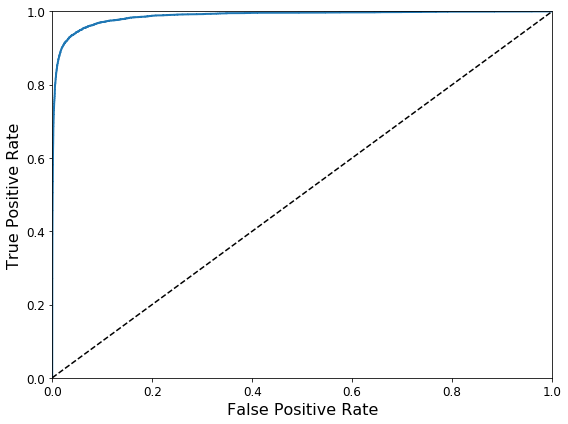

In [25]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
save_fig('roc_curve')
plt.show()

In [26]:
## ROC(AUC) Area Under the Curve is important way to compare classifiers more the AUC more the better classifier

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4,y_scores)

0.98732167936641535

## Important Question 
### when to use ROC curve vs PR curve
### if we care about false postives then PR curve
### if we care about false negatives then ROC curve


In [35]:
### Trying RandomForest CLassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_randForest_proba = cross_val_predict(forest_clf,X_train,y_train_4,cv=4,method='predict_proba')
y_scores_random = y_randForest_proba[:,1]

In [41]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_4,y_scores_random)

In [43]:
roc_auc_score(y_train_4, y_scores_random)

0.99417722125351249

Saving figure roc_curve_comparison_plot


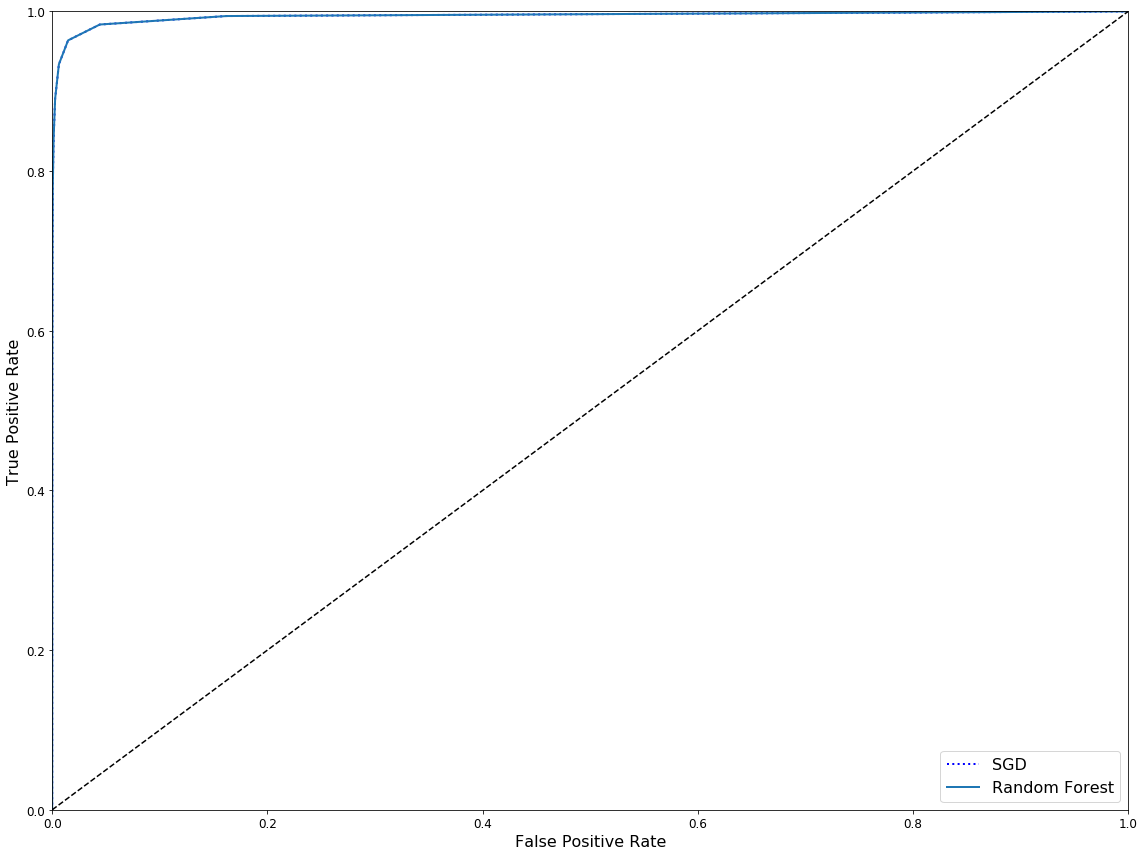

In [47]:
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [51]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv=4)
print(precision_score(y_train_4, y_train_pred_forest))
print(recall_score(y_train_4, y_train_pred_forest))

0.985373672611
0.841834988018
